# Analysis for Kickstarter

In this notebook, we are going to be taking a look at data of fundraising campaigns for art projects on the Kickstarter website.
The idea is to explore and get an intuition of what the data says by exploratory data analysis (EDA) using Python's NumPy library. Further, we will be plotting the relationships between variables using matplotlib and seaborn. The EDA can help us learn the different variables used to characterize a fundraising campaign and how they're related to each other. And most importantly, we want to understand how these variables influence the result of the campaign which will ultimately provide insight into how, on average, is effective Kickstarter in helping artists reach their funding objectives.   

In [1]:
#Import the libraries that support the functionalities we require for analysis 
import numpy as np
import matplotlib as plt
import seaborn as sns

## Understanding the amount pledged for all the projects

Our first step towards getting a sense of the data is to understand the range of the amounts pledged for all the projects for which the details have been captured in the dataset.    

In [2]:
#Extracting the data of the amount pledged from the data file

fname = 'kickstarter.csv'

amt_pledged_usd = np.loadtxt(fname, delimiter = ',', skiprows = 1, usecols = 11)

Descriptive Statistics such as the minimum, maximum, median, and standard deviation are helpul in giving us a picture of the amounts people have pledged for fundraising campaigns on Kickstarter. 

In [3]:
#Display descriptive statistics that include:
#a. Total number of projects
#b. Amount pledged (in U.S. dollars): min, max, mean, median, and standard deviation
#c. Percentage of projects that earned total pledges of at least $2,500

print('The total number of projects recorded in the dataset: ', str(len(amt_pledged_usd)))
print('Lowest amount pledged for a project: %.2f' %(amt_pledged_usd.min()))
print('Highest amount pledged for a project: %.2f' %(amt_pledged_usd.max()))
print('The average amount pledged for projects on Kickstarter: %.2f' %(amt_pledged_usd.mean()))
print('The median of the amounts pledged for projects on Kickstarter: %.2f' %(np.median(amt_pledged_usd)))
print('Standard deviation of the amounts pledged for projects on Kickstarter: %.2f' %amt_pledged_usd.std())
print('Percentage of projects that earned total pledged of at least $2,500: %.2f percent' %(sum(1 for i in amt_pledged_usd if i >= 2500)/len(amt_pledged_usd)*100))

The total number of projects recorded in the dataset:  4184
Lowest amount pledged for a project: 0.00
Highest amount pledged for a project: 111111.77
The average amount pledged for projects on Kickstarter: 1242.12
The median of the amounts pledged for projects on Kickstarter: 90.00
Standard deviation of the amounts pledged for projects on Kickstarter: 5177.93
Percentage of projects that earned total pledged of at least $2,500: 10.59 percent


Just from these summary statistics, we can glean a lot of useful information -
1. There are a total of 4184 projects in this dataset
2. There are projects which have receiving no funding on Kickstarter.
3. Fundraising campaign(s) on Kickstarter have received as high as a whopping 111,111 USD.
4. On average, from the data we have, kickstarter projects receive 1242 USD.
5. Most importantly, only 10.59% of the all the projects we've data for have received funding of 2500 USD or more. 

But these statistics are only for us to understand the scale of fundraising campaigns on Kickstarter. Knowing that 10.59% of the campaigns on Kickstarter have received >= $2500 is not sufficient for us to make assertions about the effectiveness of Kickstarter. We need to explore further.

## Analysing projects based on their categories

Projects of some categories are more popular than the others. But this is just an assumption and is a fact only if the data validates it.

In [4]:
#Extracting the categories column from the data file and loading it into an array

categories = np.loadtxt(fname, delimiter = ',', skiprows = 1, usecols = 12, dtype = str)

By plotting the frequency distribution of the project categories on a bar graph, we can learn about -
1. The standalone popularity of a particular project category
2. The relative popularity of a project category with respect to other categorie(s)

In [5]:
#Get the unique categories and how many projects of each category are there
category, category_frequencies = np.unique(categories, return_counts=True)

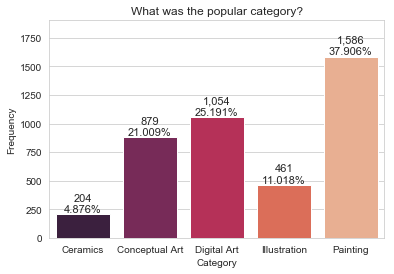

In [6]:
title = f'What was the popular category?'
sns.set_style('whitegrid')
axes = sns.barplot(x=category, y=category_frequencies, palette='rocket')
axes.set_title(title)
axes.set(xlabel='Category', ylabel='Frequency')  
axes.set_ylim(top=max(category_frequencies) * 1.20)

for bar, frequency in zip(axes.patches, category_frequencies):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    text = f'{frequency:,}\n{frequency / len(categories):.3%}'
    axes.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')

From this plot, it is clear that the most popular category is Painting with almost 40% of the projects from the dataset being in this category.
This seems intuitive because art is almost synonymous with painting and quality painting supplies are generally not cheap. 
The second most popular category is Digital Art. 
The least popular category is ceramics. This could be the case because one, ceramics is a niche area of arts and therefore, artists of this field may already be having a lot of support from art enthusiasts, and second, maybe not all ceramics artists over the world are aware of Kickstarter.

## How many campaigns of each category have been successful?

Now, it is time to find answers for some crucial questions like - Is launching a fundraising campaign on Kickstarter effective? Projects of which category have been more successful in reaching their goal? 

Once again, we need the help of a bar graph to visualize the numbers.

In [7]:
#Extracting the state column from the data file and loading it into an array

states = np.loadtxt(fname, delimiter = ',', skiprows = 1, usecols = 4, dtype = str)

In order to plot the percentage of successful projects in each category, we need to get these values from the arrays.

In [8]:
#Creating a dictionary which will store the categories and corresponding success percentages
categorySuccessDict = {}   

#A list for easy data manipulation
categoryStateList = []

#Packing the categories with corresponding states into the list
for c, s in zip(categories, states):
    categoryStateList.append([c, s])

#Finding the success percentages
for c in category:
    total = 0
    successCount = 0
    for cs in categoryStateList:
        if cs[0] == c:
            total += 1
            if cs[1] == 'successful':
                successCount += 1
    if total != 0:
        categorySuccessDict[c] = (successCount/total)
    else:
        categorySuccessDict[c]

With the success percentages for each category in a dictionary, we can plot them on a graph from which we can get an idea of which categories' projects have been more or less successful than the others in achieving their goals. 

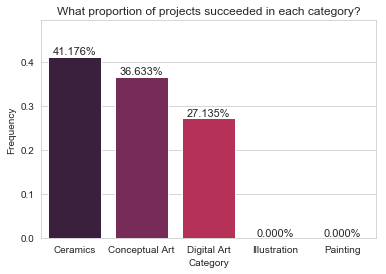

In [9]:
st = list(categorySuccessDict.values())
cat = list(categorySuccessDict.keys())

title = f'What proportion of projects succeeded in each category?'
sns.set_style('whitegrid')
axes = sns.barplot(x=category, y=st, palette='rocket')
axes.set_title(title)
axes.set(xlabel='Category', ylabel='Frequency')  
axes.set_ylim(top=max(st) * 1.20)

for bar, frequency in zip(axes.patches, st):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    text = f'{frequency:.3%}'
    axes.text(text_x, text_y, text, fontsize=11, ha='center', va='bottom')

The numbers look surprising. This graph debunks some intuitions made from looking at the previous graph -
1. Ceramics, the category with the lowest number of projects launching campaigns on Kickstarter, has the highest success rate.
2. Painting, the category with the highest number of projects launching campaigns on Kickstarter, has an astonishing 0% success rate.
3. Additionally, the Illustration category also has a 0% success rate.

So, while ceramics projects are not many on Kickstarter when compared to Painting projects, it looks like more people are encouraging of the former than the letter given how 41% of these projects succeeded whereas not even one painting project was able to reach its goal. 

## Has promoting a project on the website helped it in achieving its goal? 

We can glean this information by getting the data of whether a project was marketed as a staff pick or put in the website's spotlight.

In [10]:
#Extracting the staff_pick and spotlight columns from the data file and loading it into an array

staff_pick = np.loadtxt(fname, delimiter = ',', skiprows = 1, usecols = 8, dtype = str)
spotlight = np.loadtxt(fname, delimiter = ',', skiprows = 1, usecols = 13, dtype = str)

In [11]:
#Counting the number of projects which have been promoted

count_staff_pick = sum(1 for i in staff_pick if i == 'TRUE')
count_spotlight = sum(1 for i in spotlight if i == 'TRUE')

print('The number of projects which have been promoted as staff picks: ', count_staff_pick)
print('The number of projects which have been put on the website\'s spotlight: ', count_spotlight)

The number of projects which have been promoted as staff picks:  224
The number of projects which have been put on the website's spotlight:  692


So out of 4000+ projects, only 224 have been promoted as staff picks, and 692 have been put in the spotlight.

In [12]:
#Creating a dictionary which will store the categories and corresponding success percentages 
categoryStateSpotlightDict = {}   

#A list for easy data manipulation
categoryStateSpotlightList = []

#Packing the categories with corresponding states and spotlight status into the list
for c, s, sp in zip(categories, states, spotlight):
    if sp == 'TRUE':
        categoryStateSpotlightList.append([c, s])
        
#Finding the success percentages for projects promoted in the spotlight in each category
for c in category:
    total = 0
    successCount = 0
    for cs in categoryStateSpotlightList:
        if cs[0] == c:
            total += 1
            if cs[1] == 'successful':
                successCount += 1
    if total != 0:
        categoryStateSpotlightDict[c] = (successCount/total)
    else:
        categoryStateSpotlightDict[c] = 0

Now, we plot the success percentages for project categories wherein the projects were promoted in the spotlight.

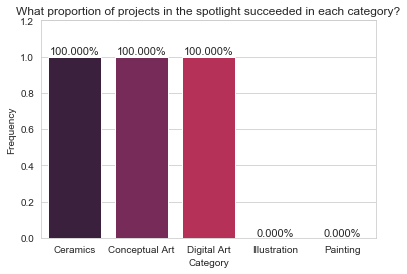

In [13]:
st_spotlight = list(categoryStateSpotlightDict.values())
cat_spotlight = list(categoryStateSpotlightDict.keys())

title = f'What proportion of projects in the spotlight succeeded in each category?'
sns.set_style('whitegrid')
axes = sns.barplot(x=category, y=st_spotlight, palette='rocket')
axes.set_title(title)
axes.set(xlabel='Category', ylabel='Frequency')  
axes.set_ylim(top=max(st_spotlight) * 1.20)

for bar, frequency in zip(axes.patches, st_spotlight):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    text = f'{frequency:.3%}'
    axes.text(text_x, text_y, text, fontsize=11, ha='center', va='bottom')

So this graph provides more insight about the significance of promoting a project. All projects of the Ceramics, Conceptual Art, and Digital Art categories that were put in the spotlight were successful in achieving their goal. Now let's look at the significance of promoting a project as a staff pick.

In [14]:
#Creating a dictionary which will store the categories and corresponding success percentages 
categoryStateStaffPickDict = {}   

#A list for easy data manipulation
categoryStateStaffPickList = []

#Packing the categories with corresponding states and staff_pick status into the list
for c, s, stp in zip(categories, states, staff_pick):
    if stp == 'TRUE':
        categoryStateStaffPickList.append([c, s])
        
#Finding the success percentages for projects promoted in the staff_pick in each category
for c in category:
    total = 0
    successCount = 0
    for cs in categoryStateStaffPickList:
        if cs[0] == c:
            total += 1
            if cs[1] == 'successful':
                successCount += 1
    if total != 0:
        categoryStateStaffPickDict[c] = (successCount/total)
    else:
        categoryStateStaffPickDict[c] = 0

Once again, we plot the data on a bar graph.

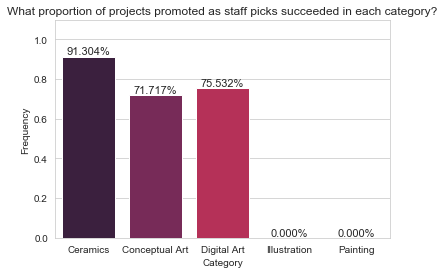

In [15]:
st_staffPick = list(categoryStateStaffPickDict.values())
cat_staffPick = list(categoryStateStaffPickDict.keys())

title = f'What proportion of projects promoted as staff picks succeeded in each category?'
sns.set_style('whitegrid')
axes = sns.barplot(x=category, y=st_staffPick, palette='rocket')
axes.set_title(title)
axes.set(xlabel='Category', ylabel='Frequency')  
axes.set_ylim(top=max(st_staffPick) * 1.20)

for bar, frequency in zip(axes.patches, st_staffPick):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    text = f'{frequency:.3%}'
    axes.text(text_x, text_y, text, fontsize=11, ha='center', va='bottom')

The success rates with projects promoted as staff picks aren't perfect like those put on the website's spotlight. Especially with the case of projects of the Conceptual Art category wherein close to 30% didn't succeed eventhough they were promoted as staff picks. 

So it looks like while promotion through staff picks is effective, it is not as effective as putting them in the spotlight. It is important to note, once again, that there are more projects promoted in the spotlight compared to those marketed as staff picks. 

The next question that may arise is, why is promotion in the spotlight 100% effective whereas it is not as much with marketing by staff picks.

One plausible reason could be that putting a project in the spotlight grabs more attention when compared to those promoted as staff picks. A project is more likely to be viewed by a user if it is put in the spotlight when compared to it being promoted by a staff member. Secondly, staff picks while providing reasonable credibility to a project, are based on an individual's subjectivity and may not be a general sentiment. But this is an assumption and needs to be explored further through more data analysis.

# Where are the artists from?

Location matters. 
How are the projects distributed over different countries?

In [16]:
#Extracting the country columns from the data file and loading it into an array

countries = np.loadtxt(fname, delimiter = ',', skiprows = 1, usecols = 5, dtype = str)

Let's find out the answer to the first question - Distribution of projects over different countries.

In [17]:
#Get the unique countries and how many projects of each category are there
country, country_frequencies = np.unique(countries, return_counts=True)

We plot this data on a bar graph.

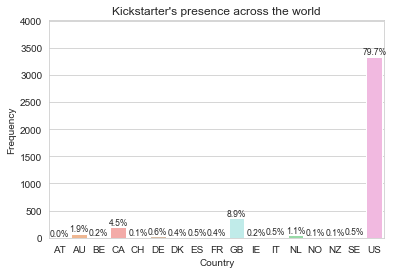

In [18]:
title = f'Kickstarter\'s presence across the world'
sns.set_style('whitegrid')
axes = sns.barplot(x=country, y=country_frequencies, palette='pastel')
axes.set_title(title)
axes.set(xlabel='Country', ylabel='Frequency')  
axes.set_ylim(top=max(country_frequencies) * 1.20)

for bar, frequency in zip(axes.patches, country_frequencies):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    text = f'{frequency / len(countries):.1%}'
    axes.text(text_x, text_y, text, 
              fontsize=8.5, ha='center', va='bottom')

The picture says it all about the userbase of the Kickstarter. 85% of the fundraising campaigns from the Kickstarter data are initiated by artists in North America. The second country where Kickstarter is popular is Great Britian. There are few artists in Netherlands and Denmark as well as Australia who use the platform to campaign for funding their projects.

# Conclusions

Exploring the data has provided us a range of insights which we can use to further our analytical efforts in improving the product and services that Kickstarter has to offer.

1. Though painting is the most popular category for artists to initiate fundraising campaigns on Kickstarter, not even one of them has been successful in reaching their goals on the website. This is also the category which has not been promoted either on the website's spotlight or as a staff pick. Given the platform's popularity among artists who work on paintings and illustrations, Kickstarter should consider promoting projects of this category further so that it encourages other artists to use the website for starting fundraising campaigns. Else, consistent failure of projects of this category will lead to diminishhing popuarity of the platform.

2. Almost all fundraising campaigns on Kickstarter are initiated by artists in North America. The other region that seems to be interested in exploring what Kickstarter has to offer is Europe. It is being used by artists in Great Britian, Denmark, Netherlands, and Sweden. The European Union (and Great Britian) has a population that is known for its artistic inclinations. Hence, it is recommended for Kickstarter to invest efforts into analysing this market and possibly promoting the website in this region since there is potential there.